In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Shapefile 원본 좌표계: None


C:\Users\mycom\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mycom\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mycom\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mycom\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mycom\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948

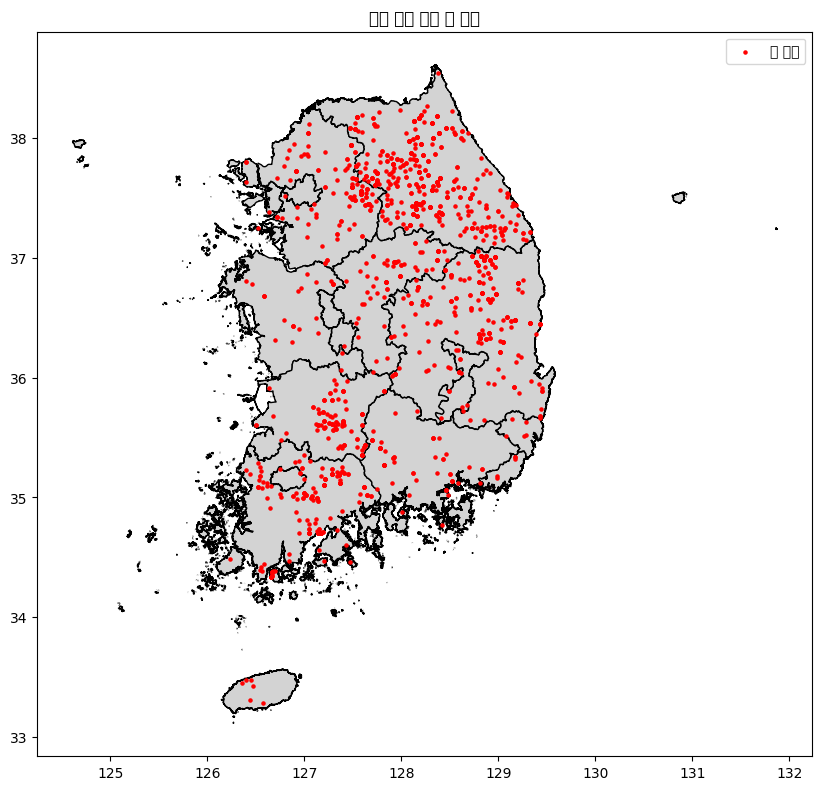

In [ ]:
def plot_bee_data_on_korea_map(shp_file, csv_file):
    korea_map = gpd.read_file(shp_file)
    
    # Shapefile 좌표계 확인
    print("Shapefile 원본 좌표계:", korea_map.crs)
    if korea_map.crs is None:
        korea_map.set_crs("EPSG:5179", inplace=True)  # 보통 한국 Shapefile은 EPSG:5179 사용
    korea_map = korea_map.to_crs("EPSG:4326")  # WGS84 변환
    
    bee_data = pd.read_csv(csv_file, encoding='euc-kr')
    bee_data = bee_data[['Longitude', 'Latitude']].dropna()
    
    gdf_bee = gpd.GeoDataFrame(
        bee_data, geometry=gpd.points_from_xy(bee_data['Longitude'], bee_data['Latitude']), crs="EPSG:4326"
    )
    
    fig, ax = plt.subplots(figsize=(10, 10))
    korea_map.plot(ax=ax, color='lightgray', edgecolor='black')
    gdf_bee.plot(ax=ax, marker='o', color='red', markersize=5, label='벌 위치')
    
    plt.title('SBV Location')
    plt.legend()
    plt.show()

# 실행
if __name__ == "__main__":
    plot_bee_data_on_korea_map('../../data/raw/map.shp', '../../data/raw/SBV_Infection_Location.csv')


In [ ]:
csv_file = "../../data/raw/SBV_Infection_Location.csv"
df = pd.read_csv(csv_file, encoding="euc-kr")

# '농장소재지' 열에서 첫 번째 띄어쓰기 이전의 값만 남기기
df["농장소재지:value_counts"] = df["농장소재지"].str.split().str[0]

value_counts = df["농장소재지:value_counts"].value_counts()

print(value_counts)

농장소재지:value_counts
강원도        492
경상북도       267
전라남도       170
경기도        147
전라북도       106
충청북도        71
경상남도        59
충청남도        24
대구광역시        6
제주특별자치도      6
인천광역시        5
부산광역시        5
울산광역시        5
광주광역시        4
대전광역시        1
Name: count, dtype: int64
